In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [5]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [ ]:
test_data.describe()

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
fig = plt.figure(figsize=(4,6))  # 指定绘图对象的宽度和高度
sns.boxplot(train_data['V0'],orient="V", width=0.5)

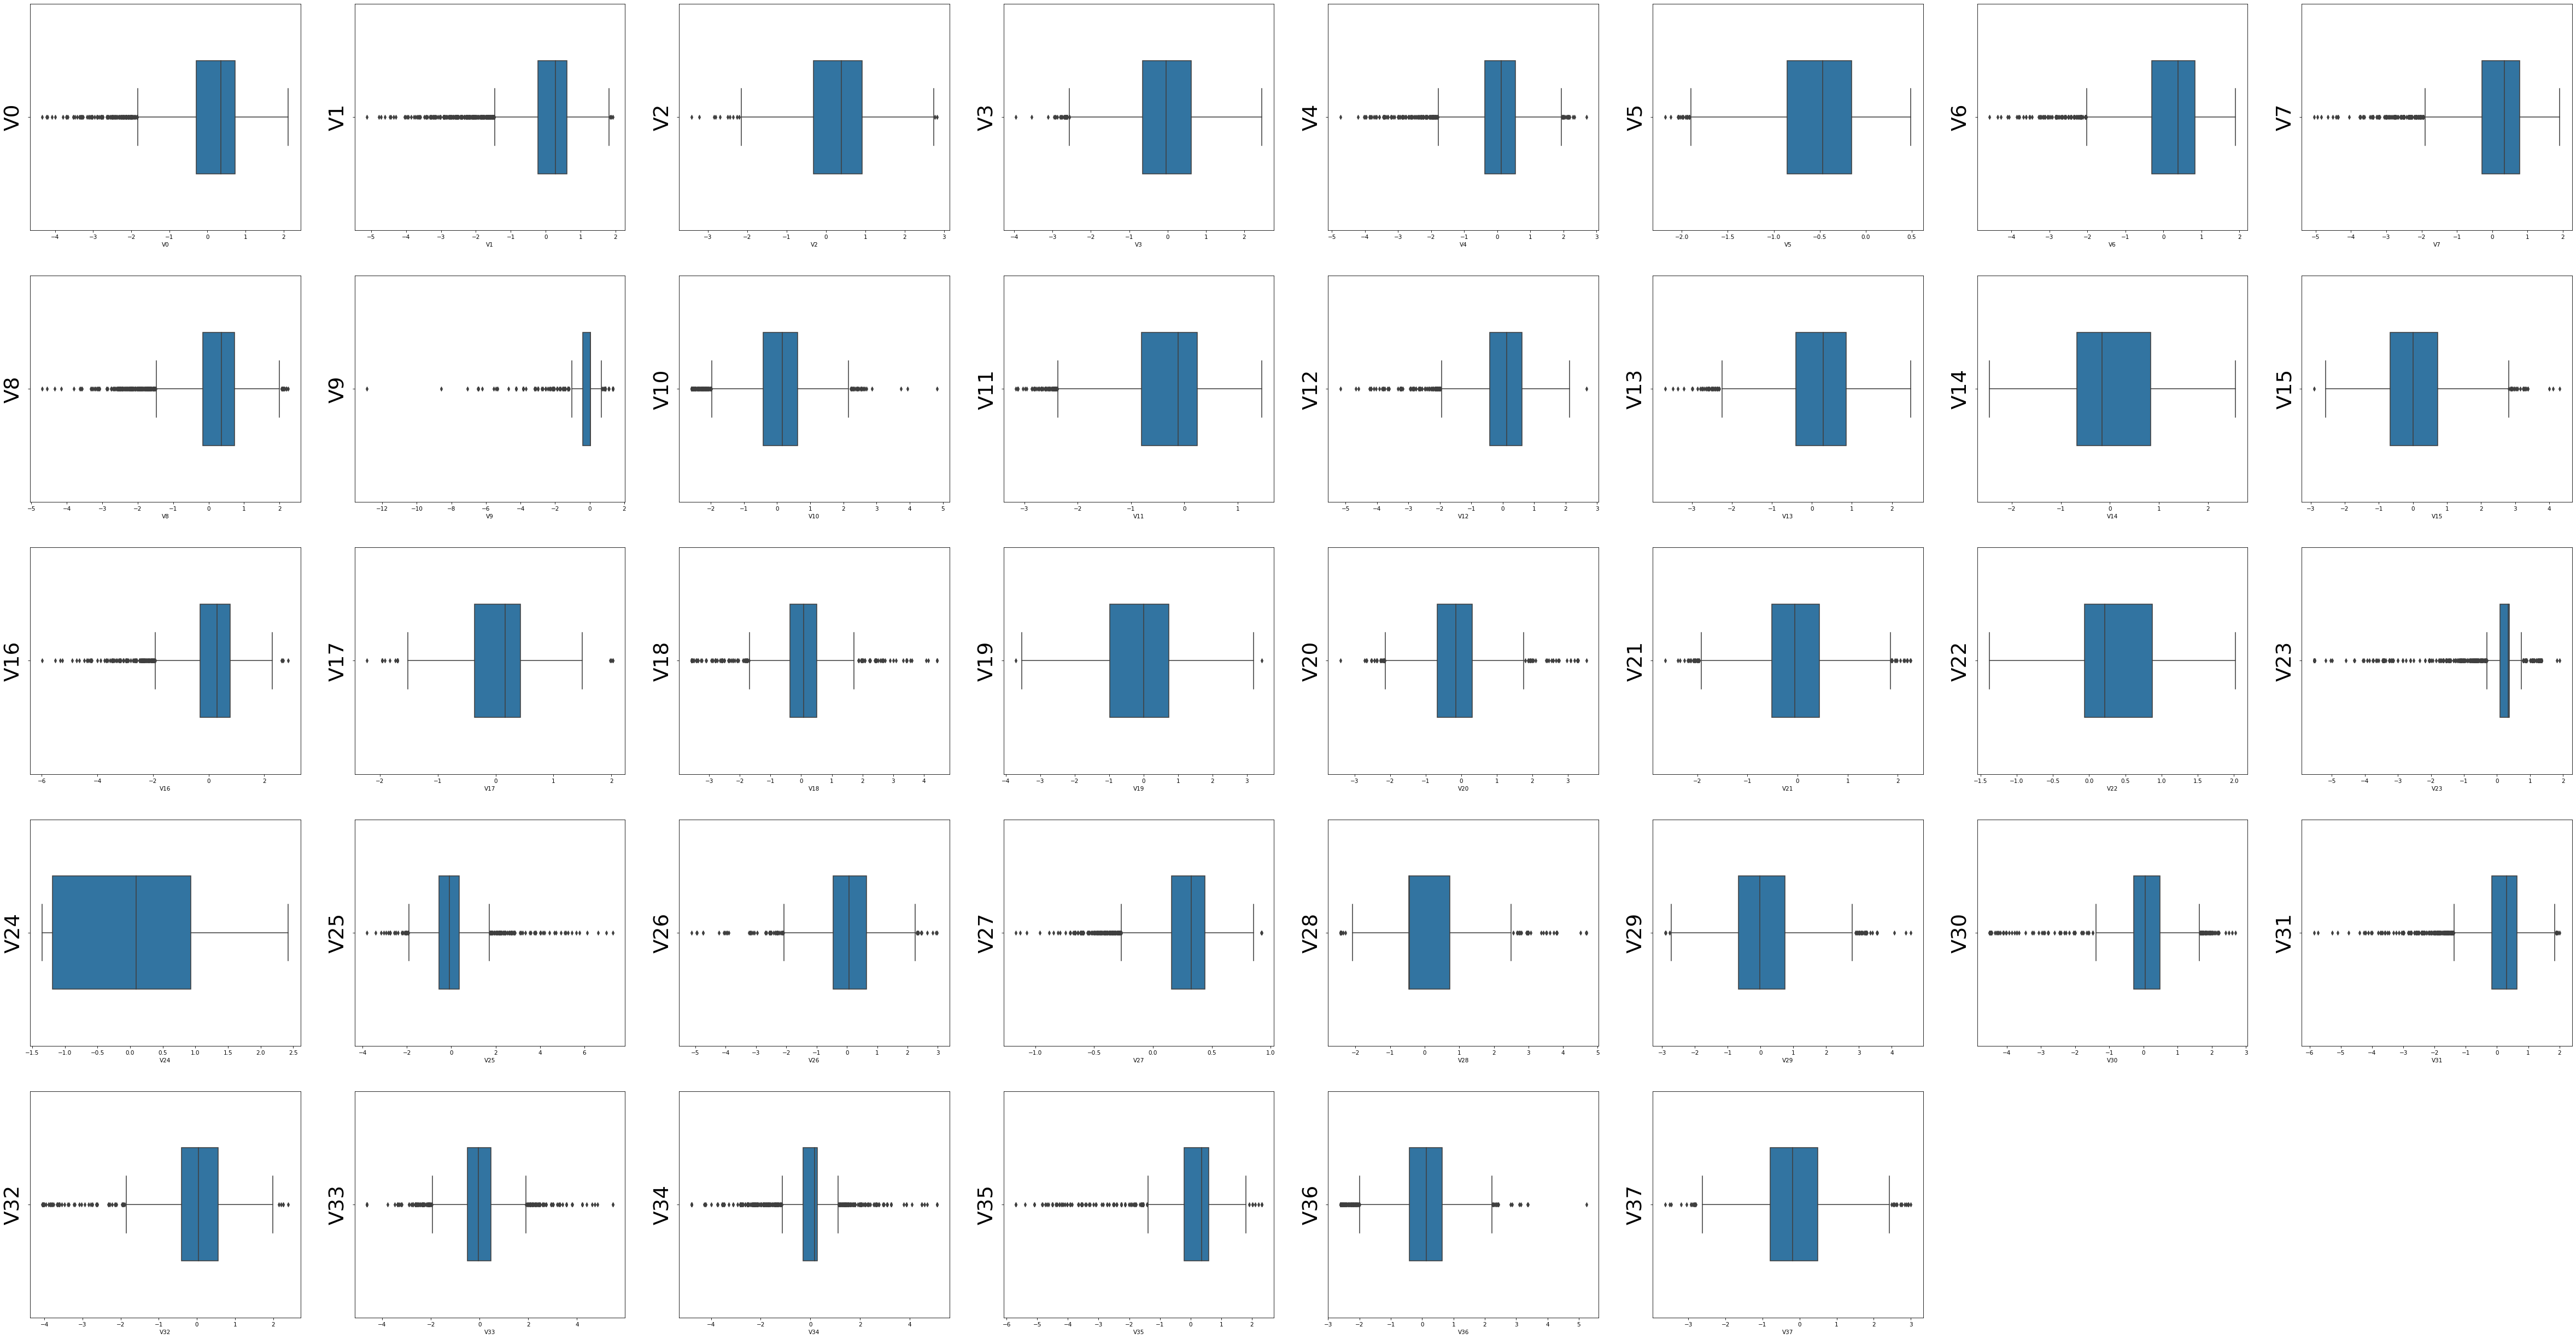

In [10]:
column =train_data.columns.tolist() [:39]  # 列表头
fig = plt.figure(figsize=(80,60), dpi=75)  # 指定绘图对象的宽度和高度
for i in range(38):
    plt.subplot(7, 8, i+1)  # 7行8列子图
    sns.boxplot(train_data[column[i]], orient="V", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=36)
plt.show()

In [11]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, x, y, sigma=3):
    
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(x), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(x,y)
        y_pred = pd.Series(model.predict(x), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=', model.score(x,y))
    print('mse=', mean_squared_error(y,y_pred))
    print('---------------------------------------')
    
    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')
    
    print(len(outliers),'outliers')
    print(outliers.tolist())
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred');
 
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred');
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 0.8890858938210386
mse= 0.10734857773123631
---------------------------------------
mean of residuals: -4.2286888057052364e-17
std of residuals: 0.32769766731934985
---------------------------------------
31 outliers
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


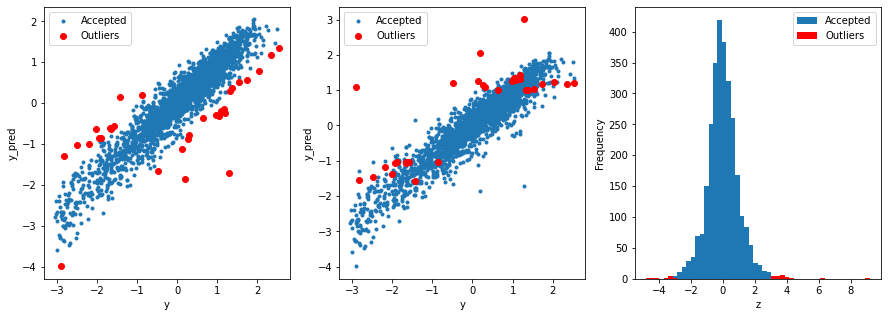

In [12]:
from sklearn.linear_model import Ridge  # Ridge为岭回归模型
from sklearn.metrics import mean_squared_error
X_train = train_data.iloc[:,0:-1]  # df.iloc[where] 根据整数位置选择单行或多行 df.iloc[:,where] 根据整数位置选择单列或多列
Y_train = train_data.iloc[:,-1]
outliers = find_outliers(Ridge(), X_train, Y_train)

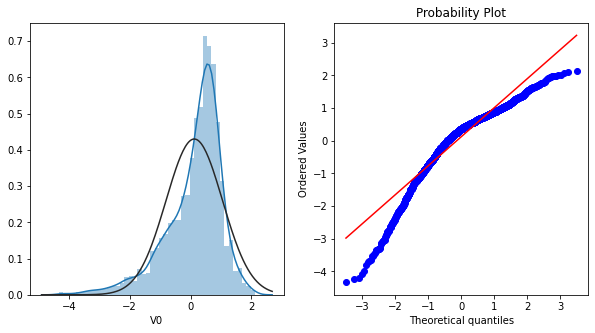

In [13]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(train_data['V0'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], plot=plt)

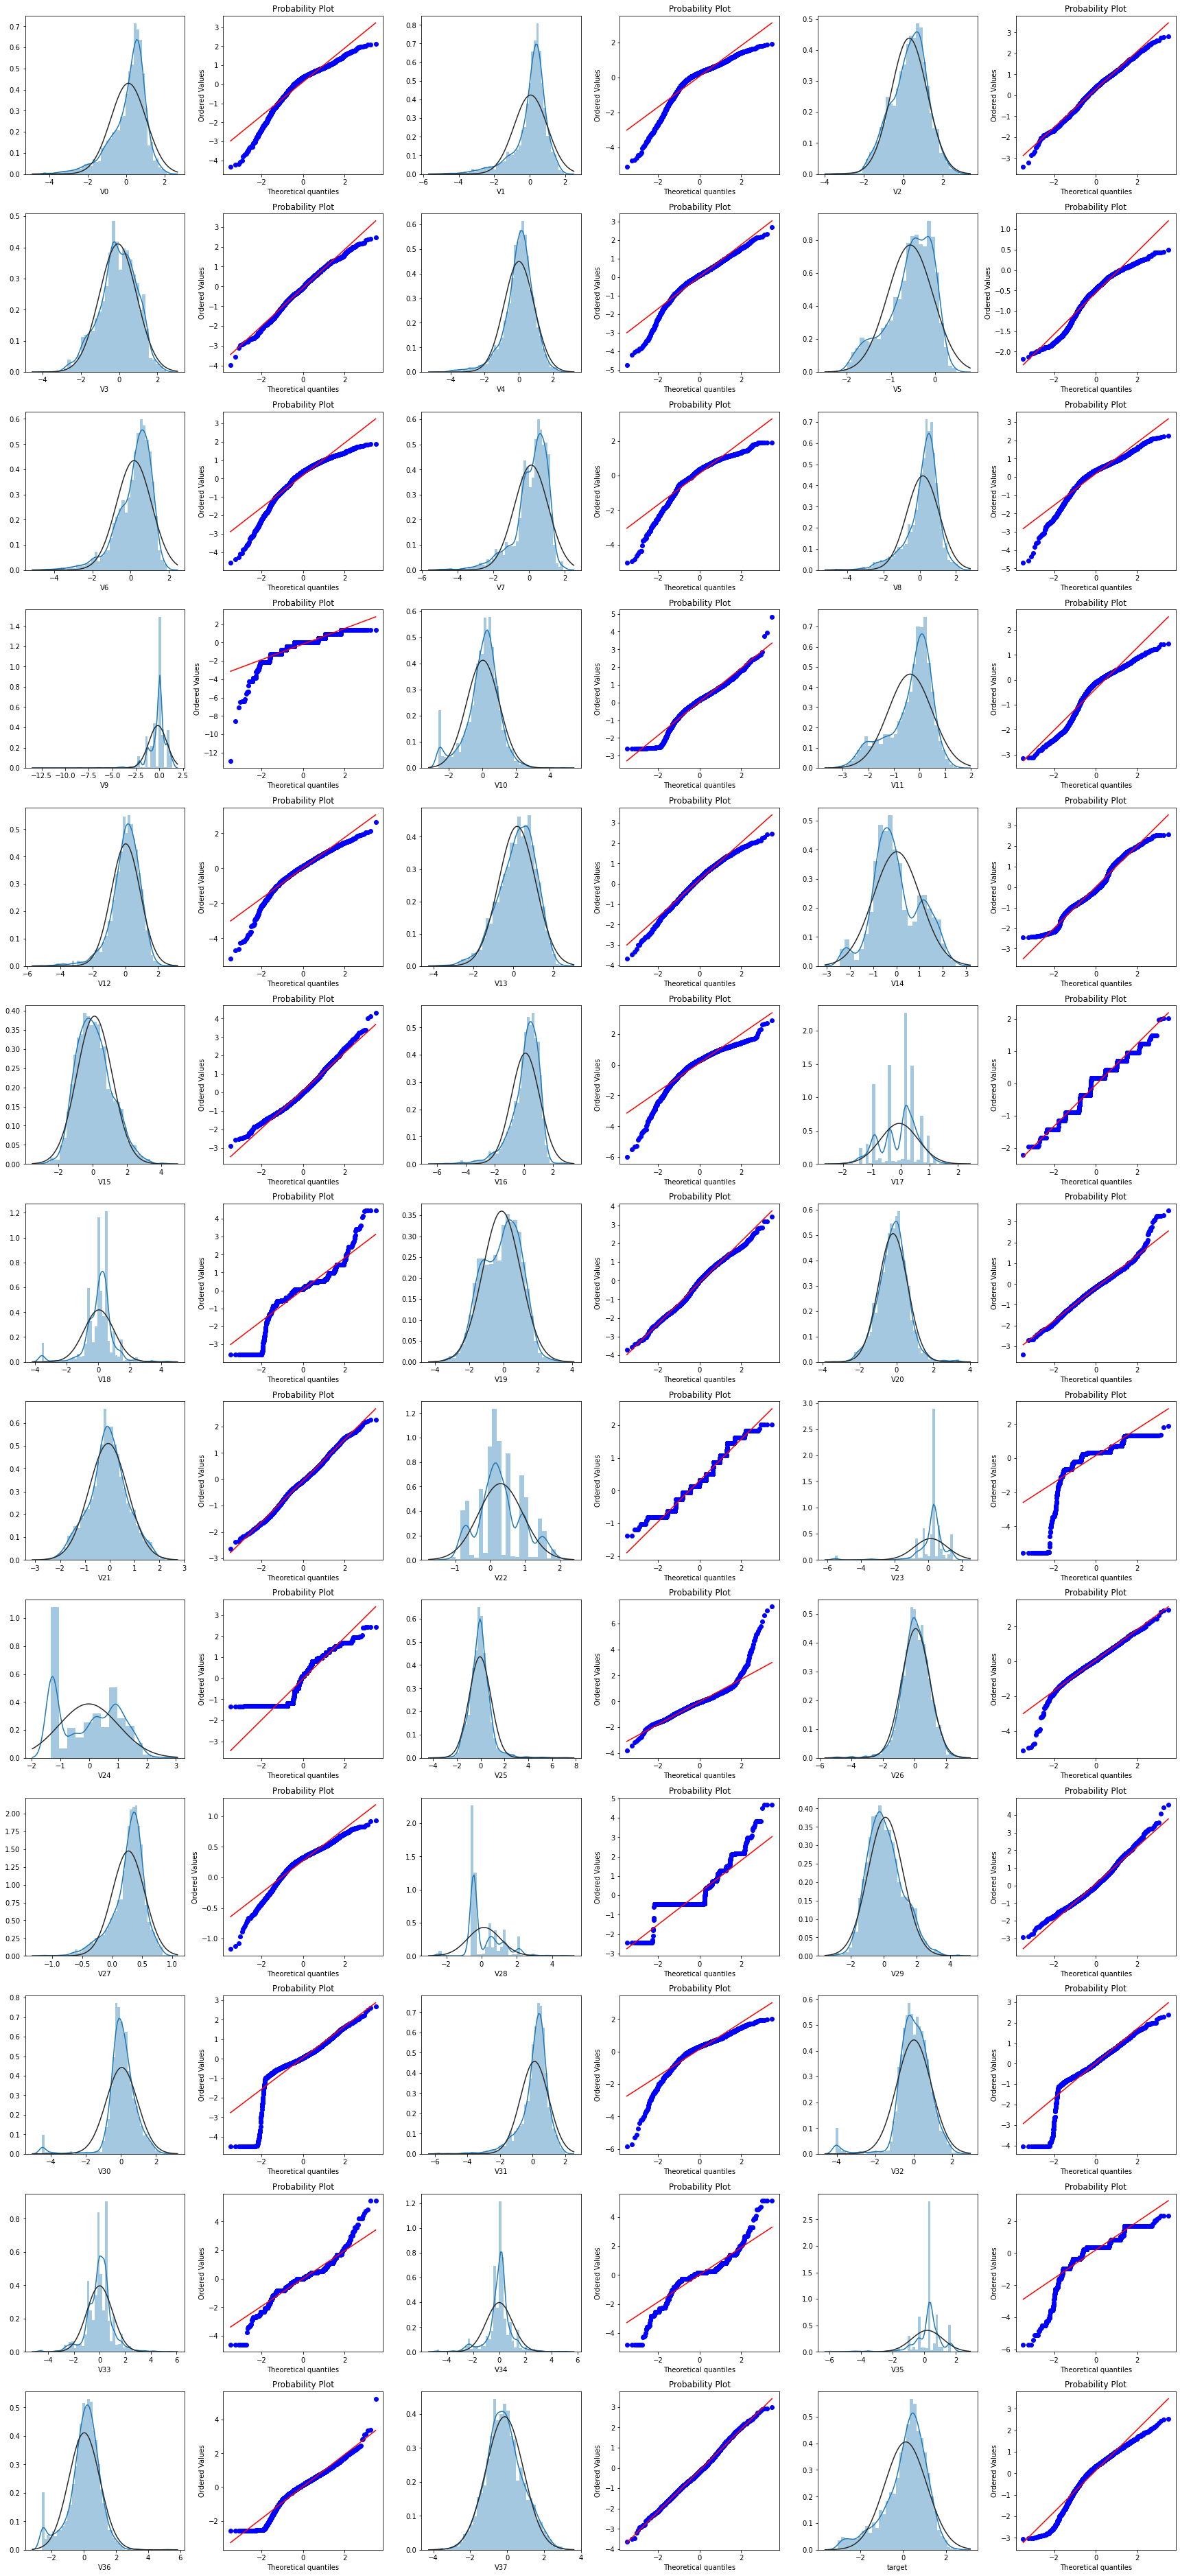

In [14]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i = 0
for col in train_data.columns:
    i += 1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i += 1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
    
plt.tight_layout()
plt.show()

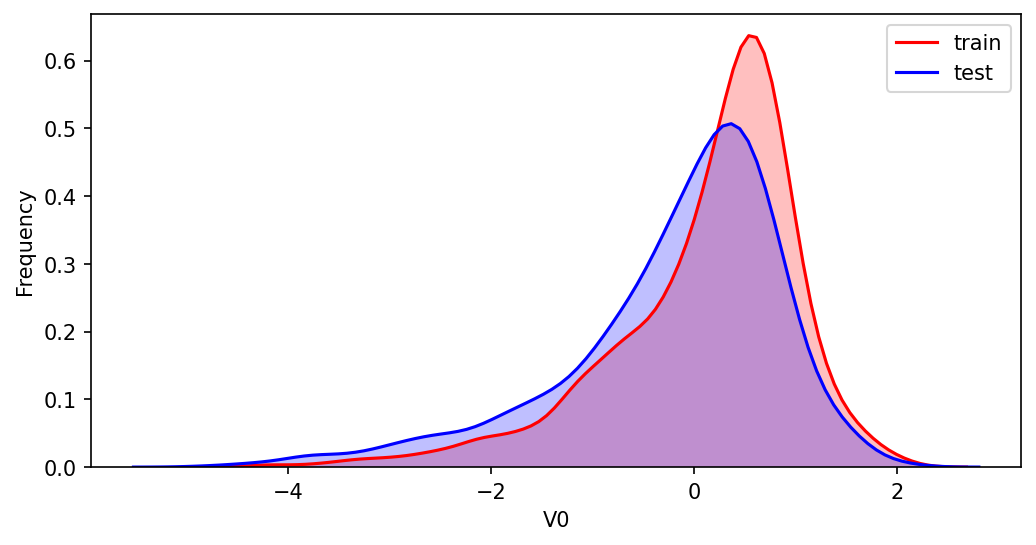

In [15]:
plt.figure(figsize=(8,4),dpi=150)
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

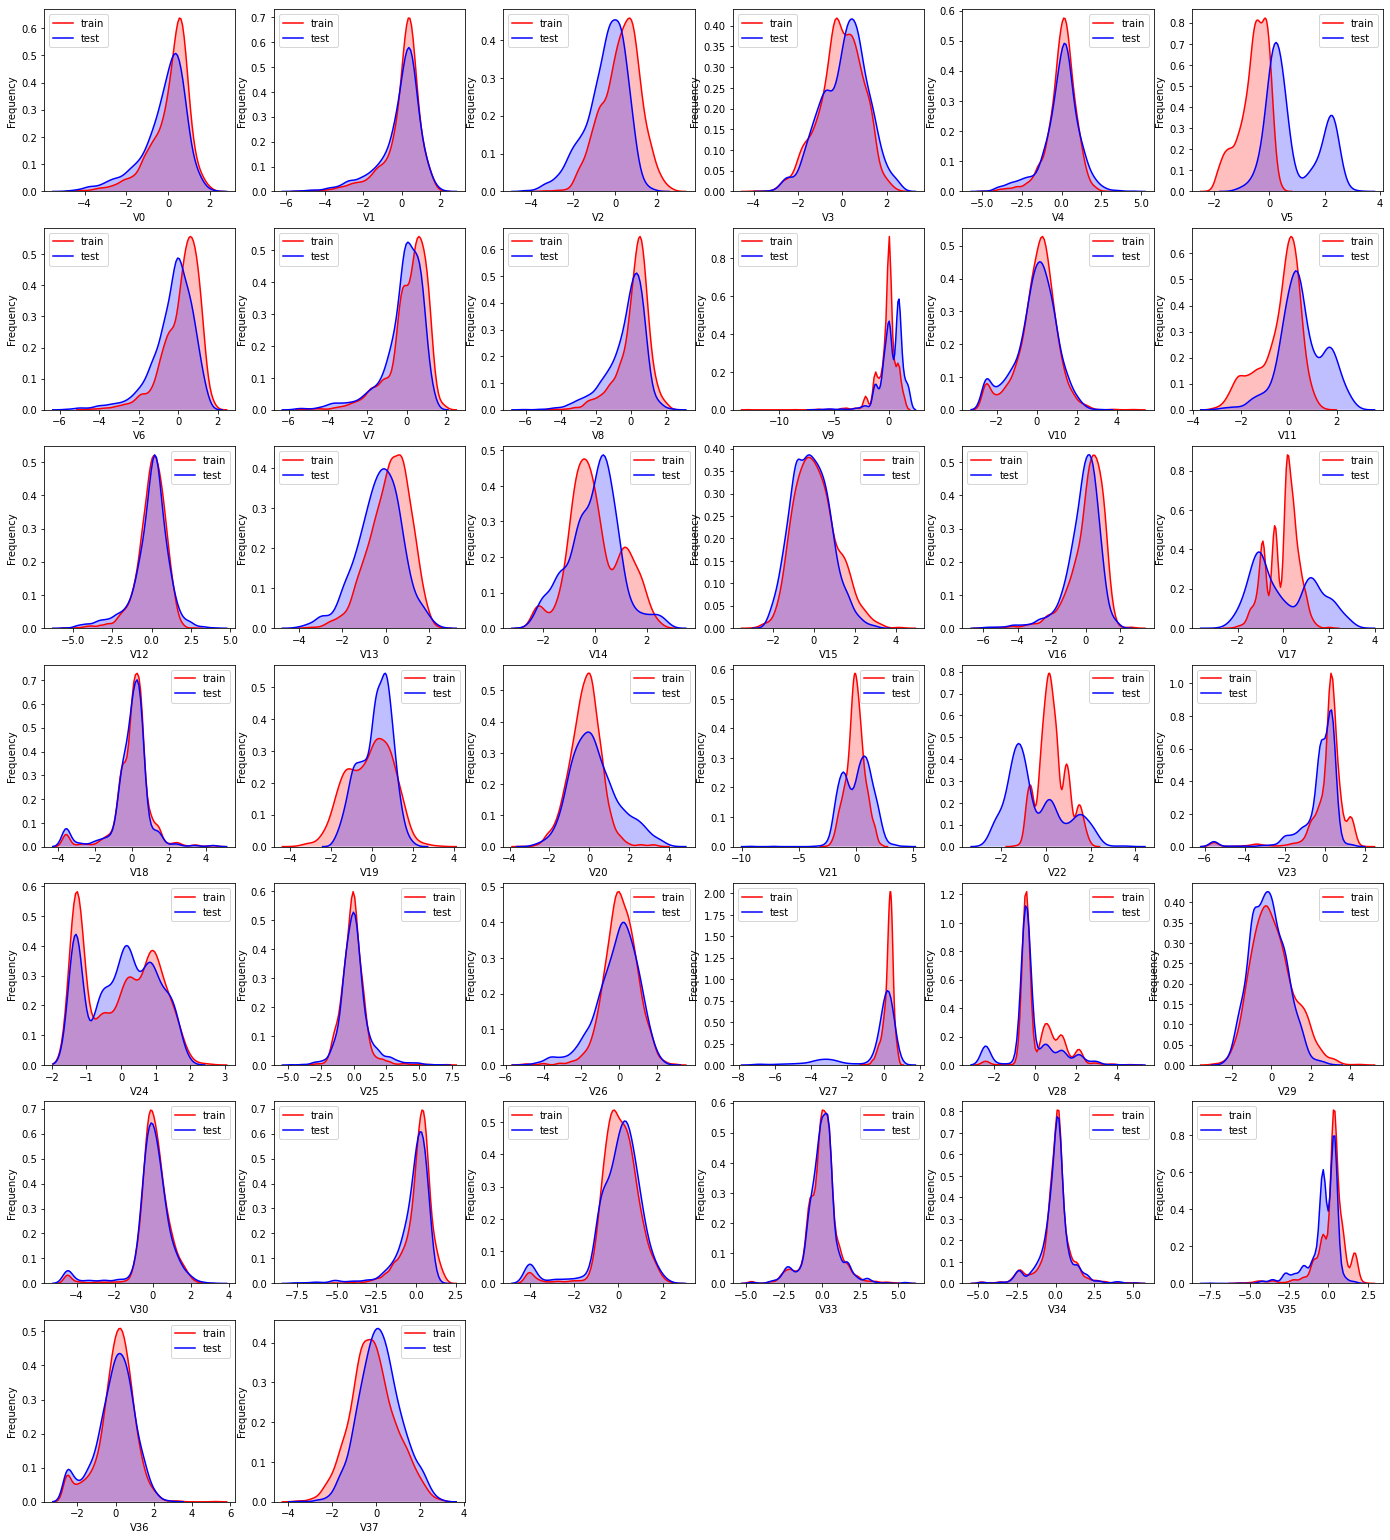

In [16]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
    i += 1
plt.show()

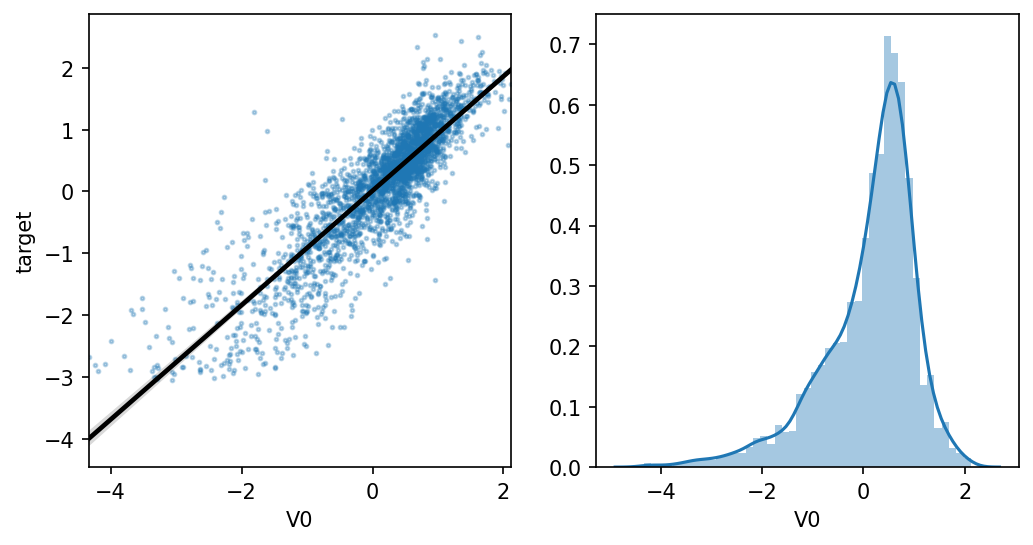

In [17]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4),dpi=150)

ax=plt.subplot(1,2,1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, scatter_kws={'marker':'.','s':3,'alpha':0.3},line_kws={'color':'k'});
# 's'表示 点 大小 'alpha' 表示 点 颜色深浅
plt.xlabel('V0')
plt.ylabel('target')

ax=plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

In [ ]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i = 0
for col in test_data.columns:
    i += 1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, scatter_kws={'marker':'.','s':3,'alpha':0.3},line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i += 1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

In [ ]:
pd.set_option('display.max_columns', 10) # 最大保留10行 中间用省略号表示
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1) # 默认情况下删除某一行；如果要删除某列，需要axis=1
train_corr = data_train1.corr()
train_corr

In [ ]:
#计算相关性系数
ax = plt.subplots(figsize=(20, 16))  # 调整画布大小
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)  # 画热力图  vmax,vmin, 图例中最大值和最小值的显示值，没有该参数时默认不显示
# annotate的缩写，annot默认为False，当annot为True时，在heatmap中每个方格写入数据

In [ ]:
# 根据相关系数筛选特征变量
k = 10  # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10,10))  # 调整画布大小
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

In [ ]:
# z找出与target变量的相关系数大于0.5的特征变量
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#  Box-Cox变换

In [ ]:
drop_columns = ['V5','V9','V11','V17','V22','V28']
#  合并训练集和测试集的数据
train_x = train_data.drop(['target'], axis=1)

# data_all = pd.concat([train_data,test_data],axis=0,ignore_index=True)
data_all = pd.concat([train_x,test_data])

data_all.drop(drop_columns,axis=1,inplace=True)
data_all.head()

In [ ]:
# 对合并后的每列数据进行归一化

cols_numeric=list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

In [ ]:
# train_data_process = train_data[cols_numeric]

# train_data_precess = train_data_process[cols_numeric].apply(scale_minmax,axis=0)
# test_data_process = test_data[cols_numeric]
# test_data_process = test_data_process[cols_numeric].apply(scale_minmax,axis=0)

In [ ]:
# 对特征变量做Box-Cox变换后，计算分位图并画图展示（基于正态分布），显示特征变量与target变量的线性关系

cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols, 4*frows))
i = 0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm)
    plt.title(var + 'Original')
    plt.xlabel('')
    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)
    plt.title('skew' + '{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)
    
    print(dat[var].shape)
    print(dat['target'].shape)
    
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)
    plt.title(var + 'Tramsformed')
    plt.xlabel('')
    i +=1 
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)
    plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    i += 1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)
    plt.title('corr=' + '{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))